# Allowing Human Feedback in Agents

Many applications may require putting humans in-the-loop with agents. For example, to allow human feedback to steer agents in the right direction, specify goals, etc. In this chapter, we will show how AutoGen supports human intervention.

In AutoGen’s ```ConversableAgent```, the human-in-the-loop component sits in front of the auto-reply components. It can intercept the incoming messages and decide whether to pass them to the auto-reply components or to provide human feedback. The figure below illustrates the design.

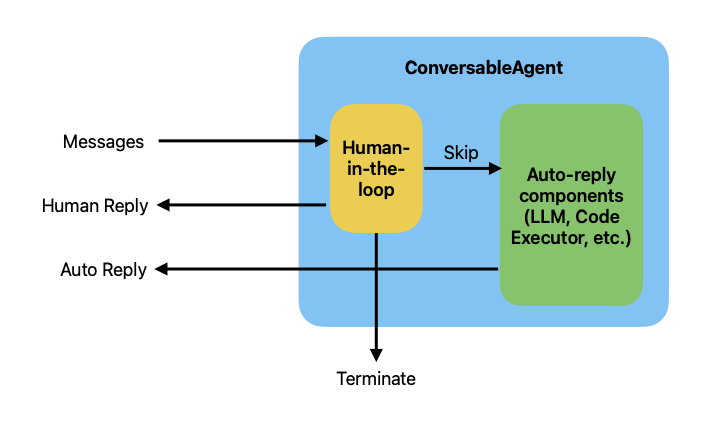

# Human Input Modes

Currently AutoGen supports three modes for human input. The mode is specified through the human_input_mode argument of the ConversableAgent. The three modes are:

1. ```NEVER```: human input is never requested.
2. ```TERMINATE``` (default): human input is only requested when a termination condition is met. Note that in this mode if the human chooses to intercept and reply, the conversation continues and the counter used by ```max_consecutive_auto_reply``` is reset.
3. ```ALWAYS```: human input is always requested and the human can choose to skip and trigger an auto-reply, intercept and provide feedback, or terminate the conversation. Note that in this mode termination based on ```max_consecutive_auto_reply``` is ignored.

# Human Input Mode = ```NEVER```
In this mode, human input is never requested and the termination conditions are used to terminate. This mode is useful when you want your agents to act fully autonomously.

Here is an example of using this mode to run a simple guess-a-number game between two agents, the termination message is set to check for the number that is the correct guess.

In [1]:
import os

from autogen import ConversableAgent

agent_with_number = ConversableAgent(
    "agent_with_number",
    system_message="You are playing a game of guess-my-number. You have the "
    "number 53 in your mind, and I will try to guess it. "
    "If I guess too high, say 'too high', if I guess too low, say 'too low'. ",
    llm_config={"config_list": [{"model": "gpt-4o-mini", "api_key": os.environ["OPENAI_API_KEY"]}]},
    is_termination_msg=lambda msg: "53" in msg["content"],  # terminate if the number is guessed by the other agent
    human_input_mode="NEVER",  # never ask for human input
)

agent_guess_number = ConversableAgent(
    "agent_guess_number",
    system_message="I have a number in my mind, and you will try to guess it. "
    "If I say 'too high', you should guess a lower number. If I say 'too low', "
    "you should guess a higher number. ",
    llm_config={"config_list": [{"model": "gpt-4o-mini", "api_key": os.environ["OPENAI_API_KEY"]}]},
    human_input_mode="NEVER",
)

result = agent_with_number.initiate_chat(
    agent_guess_number,
    message="I have a number between 1 and 100. Guess it!",
)

agent_with_number (to agent_guess_number):

I have a number between 1 and 100. Guess it!

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Is your number 50?

--------------------------------------------------------------------------------
agent_with_number (to agent_guess_number):

Too low!

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Is your number 75?

--------------------------------------------------------------------------------
agent_with_number (to agent_guess_number):

Too high!

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Is your number 62?

--------------------------------------------------------------------------------
agent_with_number (to agent_guess_number):

Too high!

--------------------------------------------------------------------